In [1]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [48]:
import os
import re
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from termcolor import colored


print(colored('All libraries imported succesfully', 'green', attrs=["bold"]))

All libraries imported succesfully


In [3]:
warnings.filterwarnings('ignore')

print(colored('All libraries configed succesfully', 'green', attrs=['bold']))

All libraries configed succesfully


In [4]:
base_directory = '/home/nima/dataset-dw/dogs-vs-cats/'
train_folder = '/home/nima/dataset-dw/dogs-vs-cats/train/'
test_folder = '/home/nima/dataset-dw/dogs-vs-cats/test1/'

In [44]:
total_count = len(os.listdir(train_folder))
print(colored(f'Number of samples in train folder : {total_count}', 'blue', attrs=['bold']))

Number of samples in train folder : 25000


In [26]:
cat_count, dog_count = 0, 0
for file_name in os.listdir(train_folder) :
    cat = re.findall("\Acat", file_name)
    dog = re.findall("\Adog", file_name)
    if cat :
        cat_count+=1
    if dog :
        dog_count+=1
print(colored(f'Number of cats : {cat_count}', 'blue', attrs=['bold']))
print(colored(f'Number of dogs : {dog_count}', 'blue', attrs=['bold']))
total_count = [cat_count, dog_count]

Number of cats : 12500
Number of dogs : 12500


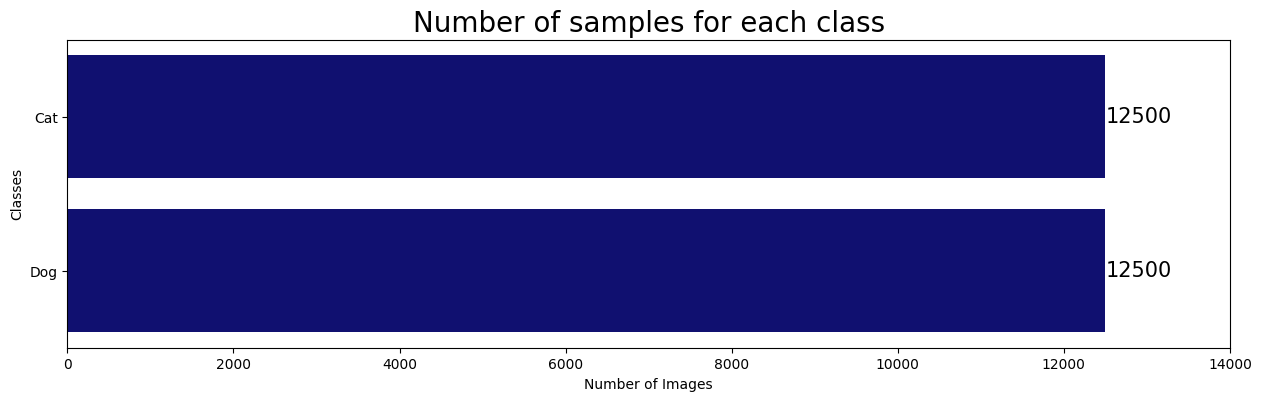

In [40]:
plt.figure(figsize=(15, 4))
ax = sns.barplot(x=total_count, y=['Cat', 'Dog'], orient='h', color='navy')
ax.set_xticks(np.arange(0, 14500, 2000))
ax.set_xlabel('Number of Images')
ax.set_ylabel('Classes')
ax.set_title('Number of samples for each class', fontsize=20)
for i, p in enumerate(ax.patches) :
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2.,
            '{}'.format(total_count[i]), 
             va="center", fontsize=15)

In [46]:
temp_df = []
for file_name in os.listdir(train_folder) :
    if re.findall("\Acat", file_name) :
        class_name = 'cat'
    else :
        class_name = 'dog'
    temp_df.append((os.path.join(train_folder, file_name), class_name))
df = pd.DataFrame(temp_df, columns=['file_path', 'label'])
df

,file_path,label
0,/home/nima/dataset-dw/dogs-vs-cats/train/dog.7...,dog
1,/home/nima/dataset-dw/dogs-vs-cats/train/dog.1...,dog
2,/home/nima/dataset-dw/dogs-vs-cats/train/dog.2...,dog
3,/home/nima/dataset-dw/dogs-vs-cats/train/dog.6...,dog
4,/home/nima/dataset-dw/dogs-vs-cats/train/dog.3...,dog
...,...,...
24995,/home/nima/dataset-dw/dogs-vs-cats/train/dog.1...,dog
24996,/home/nima/dataset-dw/dogs-vs-cats/train/cat.8...,cat
24997,/home/nima/dataset-dw/dogs-vs-cats/train/dog.8...,dog
24998,/home/nima/dataset-dw/dogs-vs-cats/train/dog.5...,dog


In [47]:
# Plot 6 image for each class

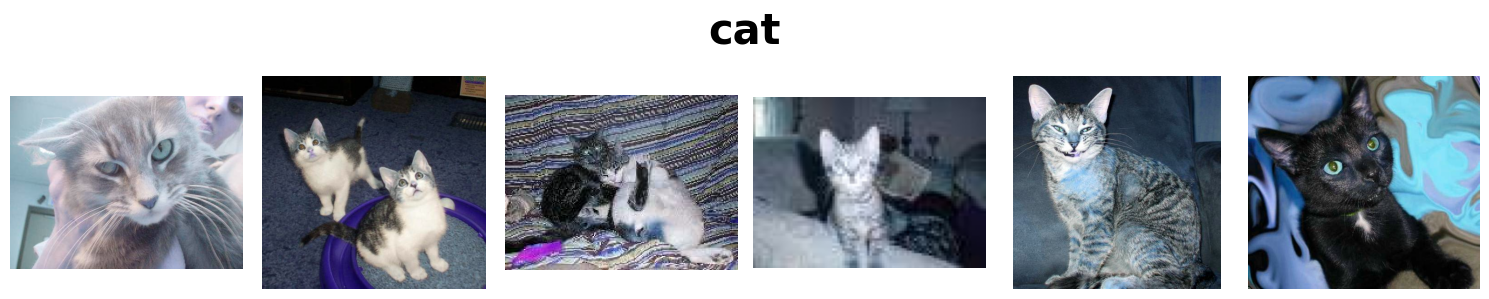

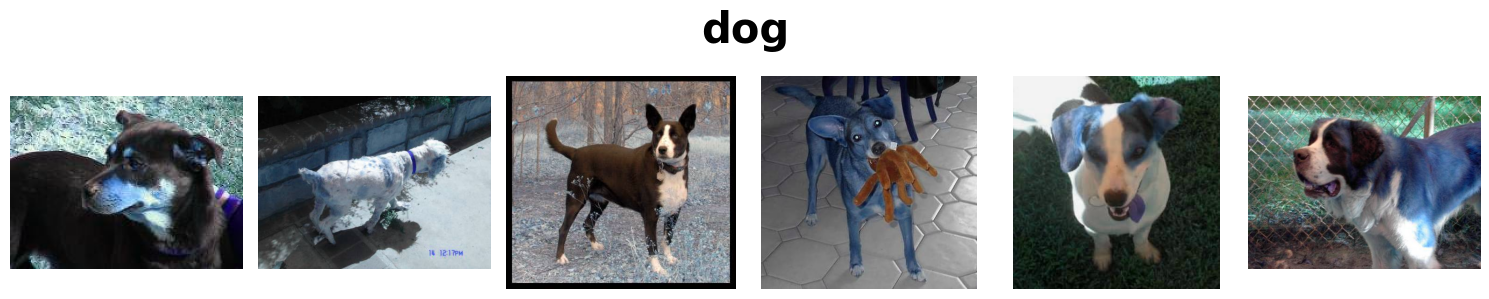

In [78]:
def plot_6_image(images, title) :
    plt.figure(figsize=(15, 3))
    for i, path in enumerate(images) :
        plt.subplot(1, 6, i+1)
        img = cv2.imread(path)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title, fontsize=30, fontweight='bold')
    plt.tight_layout()
    plt.show()
        

for classes in ['cat', 'dog'] :
    temp_df = df.file_path[df.label==classes]
    random_image = np.random.choice(temp_df, 6)
    plot_6_image(random_image, classes)